In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

import joblib


In [7]:

df = pd.read_csv("data.csv")

df = df.drop(columns=["id", "Unnamed: 32"])

df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

print("Class Distribution:")
print(y.value_counts())


Class Distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", probability=True))
])

linear_pipeline.fit(X_train, y_train)

y_pred_linear = linear_pipeline.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9649122807017544


In [11]:
rbf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True))
])

rbf_pipeline.fit(X_train, y_train)

y_pred_rbf = rbf_pipeline.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9736842105263158


In [12]:
param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": [0.01, 0.1, 1, "scale"]
}

grid = GridSearchCV(
    Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", probability=True))
    ]),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale'}
Best CV Accuracy: 0.9736263736263737


In [13]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[72  0]
 [ 3 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



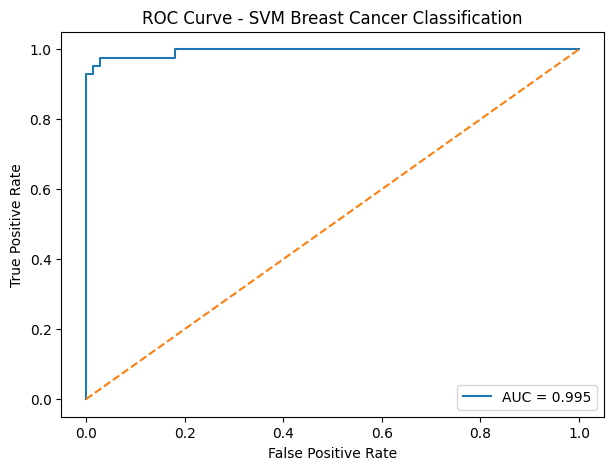

AUC Score: 0.9947089947089947


In [14]:
y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Breast Cancer Classification")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)


In [15]:
joblib.dump(best_model, "svm_breast_cancer_model.pkl")
print("Model saved as svm_breast_cancer_model.pkl")


Model saved as svm_breast_cancer_model.pkl
